<a href="https://colab.research.google.com/github/annefrancine/Machine_Learning/blob/master/MLbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlbox

     |████████████████████████████████| 20.2MB 31.5MB/s 
     |████████████████████████████████| 13.0MB 42.9MB/s 
     |████████████████████████████████| 1.9MB 41.4MB/s 
     |████████████████████████████████| 10.4MB 14.8MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 
     |████████████████████████████████| 7.1MB 29.7MB/s 
     |████████████████████████████████| 86.3MB 45kB/s 
     |████████████████████████████████| 1.2MB 12.9MB/s 
     |████████████████████████████████| 4.3MB 43.2MB/s 
     |████████████████████████████████| 112kB 40.5MB/s 
     |████████████████████████████████| 1.7MB 36.8MB/s 
     |████████████████████████████████| 3.8MB 41.1MB/s 
     |████████████████████████████████| 450kB 40.7MB/s 
  Created wheel for mlbox: filename=mlbox-0.8.4-cp36-none-any.whl size=43756 sha256=cba4a62e0ef1791197a02dd91e49a77d39e46f8d290d53ae228a4e7a567dbc6d
  Stored in directory: /root/.cache/pip/wheels/cd/47/56/277073efea0d7dfeae78248a2fed47f45756df51fff9ab5155
  Created whee

In [0]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
caminho = ["/content/drive/My Drive/AutoML/Churn_treino.csv","/content/drive/My Drive/AutoML/Churn_teste.csv"]

In [4]:
imp = Reader(sep = ";")
dados = imp.train_test_split(caminho, "Exited")


reading csv : Churn_treino.csv ...
cleaning data ...
CPU time: 5.659220218658447 seconds

reading csv : Churn_teste.csv ...
cleaning data ...
CPU time: 0.3758974075317383 seconds

> Number of common features : 10

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 2
> Number of numerical features: 8
> Number of training samples : 10000
> Number of test samples : 2474

> You have no missing values on train set...

> Task : classification
0.0    7963
1.0    2037
Name: Exited, dtype: int64

encoding target ...


In [5]:
rdrift = Drift_thresholder()
dados = rdrift.fit_transform(dados)


computing drifts ...
CPU time: 0.36950111389160156 seconds

> Top 10 drifts

('CreditScore', 0.028578092158447754)
('Balance', 0.027890056588520507)
('HasCrCard', 0.018680759902991007)
('EstimatedSalary', 0.017815683104284608)
('Geography', 0.016454001616814873)
('Gender', 0.011579870654810032)
('Tenure', 0.006263621665319352)
('NumOfProducts', 0.006017542441390411)
('Age', 0.005597089733225591)
('IsActiveMember', 0.0045000000000001705)

> Deleted variables : []
> Drift coefficients dumped into directory : save


In [6]:
otimizador = Optimiser()

/usr/local/lib/python3.6/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [0]:
espaco = {
     'fs__strategy':{"search":"choice","space":["variance","rf_feature_importance"]},
     'est__colsample_bytree':{"search":"uniform", "space":[0.3,0.7]}
}

In [8]:
modelo = otimizador.optimise(espaco,dados,max_evals=15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.3}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.36439893871492446, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : neg_log_loss = -0.3970314969740216
VARIANCE : 0.000690560822930425 (fold 1 = -0.3977220577969521, fold 2 = -0.3963409361510912)
CPU time: 1.418031


fitting the pipeline ...
CPU time: 1.9101409912109375 seconds


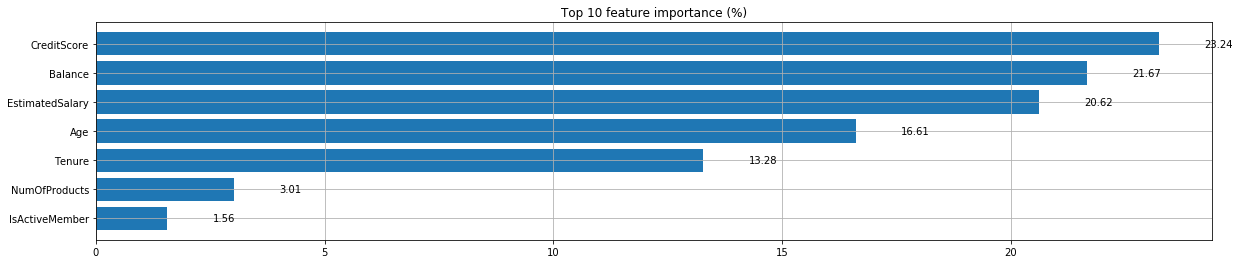


> Feature importances dumped into directory : save

predicting ...
CPU time: 0.09225082397460938 seconds

> Overview on predictions : 

        0.0       1.0  Exited_predicted
0  0.706120  0.293880                 0
1  0.980511  0.019489                 0
2  0.936784  0.063216                 0
3  0.207324  0.792676                 1
4  0.370915  0.629085                 1
5  0.952282  0.047718                 0
6  0.928365  0.071635                 0
7  0.635891  0.364109                 0
8  0.353668  0.646332                 1
9  0.760367  0.239633                 0

dumping predictions into directory : save ...


In [9]:
previsor = Predictor()
previsor.fit_predict(modelo, dados)
